# Student Performance Data Analysis

This notebook performs a data analysis project on the student performance dataset using Python. The analysis includes data loading, exploration, cleaning, answering specific questions, and visualizations.

## 1. Data Loading

Load the dataset using pandas and display the first few rows.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("../Downloads/student/student-mat.csv", sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2. Data Exploration

Check for missing values, display column data types, and understand the dataset's size.

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display column data types
print("\nColumn data types:\n", df.dtypes)

# Dataset size
print("\nDataset shape (rows, columns):", df.shape)

Missing values in each column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Column data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery

## 3. Data Cleaning

Handle missing values and remove duplicate entries.

In [9]:
# Remove duplicate entries
df_cleaned = df.drop_duplicates()

# Fill missing values with median (if any)
df_cleaned = df_cleaned.fillna(df_cleaned.median(numeric_only=True))

# Display the shape after cleaning
print("\nShape after cleaning:", df_cleaned.shape)


Shape after cleaning: (395, 33)


## 4. Data Analysis Questions

Answer the following questions:
1. What is the average score in math (G3)?
2. How many students scored above 15 in their final grade (G3)?
3. Is there a correlation between studytime and the final grade (G3)?
4. Which gender has a higher average final grade (G3)?

In [11]:
# 1. Average score in math (G3)
average_score = df_cleaned['G3'].mean()
print(f"Average final grade (G3): {average_score:.2f}")

# 2. Number of students scoring above 15
num_above_15 = df_cleaned[df_cleaned['G3'] > 15].shape[0]
print(f"Number of students scoring above 15: {num_above_15}")

# 3. Correlation between studytime and final grade (G3)
correlation = df_cleaned['studytime'].corr(df_cleaned['G3'])
print(f"Correlation between studytime and final grade (G3): {correlation:.2f}")

# 4. Gender with higher average final grade
avg_grade_by_gender = df_cleaned.groupby('sex')['G3'].mean()
print("Average final grade by gender:\n", avg_grade_by_gender)

Average final grade (G3): 10.42
Number of students scoring above 15: 40
Correlation between studytime and final grade (G3): 0.10
Average final grade by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


## 5. Data Visualization

Create the following plots:
1. Histogram of final grades (G3)
2. Scatter plot between studytime and final grade (G3)
3. Bar chart comparing average scores of male and female students

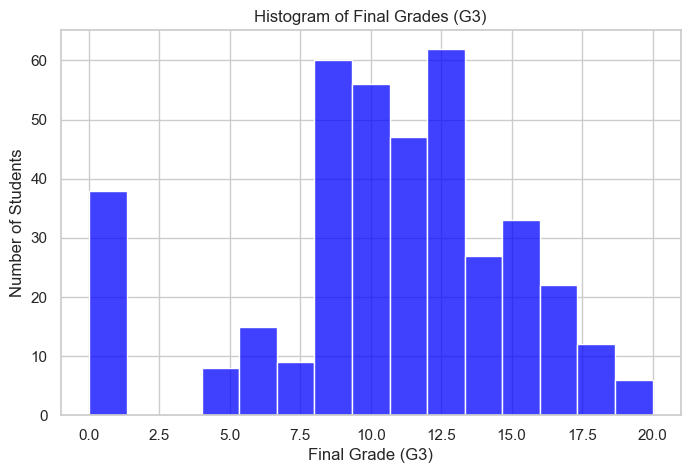

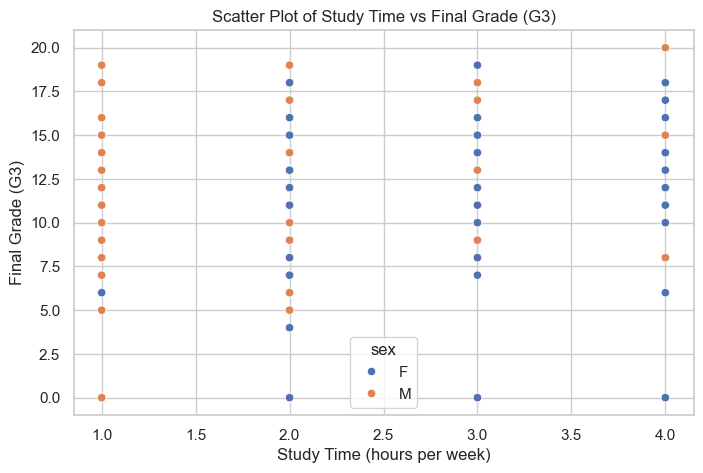

/var/folders/s4/3v4cf47d00vft8bzr_jtspcc0000gn/T/ipykernel_39701/2991460808.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='G3', data=avg_scores, palette='pastel')


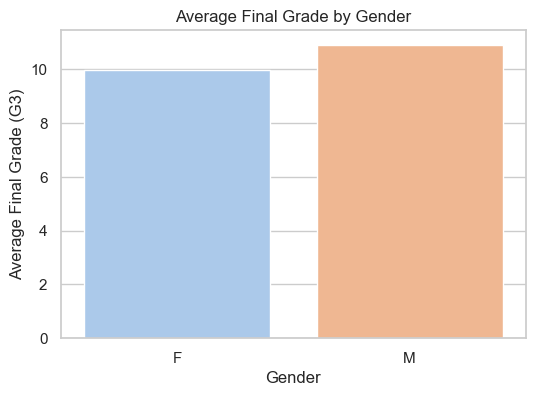

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of final grades (G3)
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['G3'], bins=15, kde=False, color='blue')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.show()

# 2. Scatter plot between studytime and final grade (G3)
plt.figure(figsize=(8,5))
sns.scatterplot(x='studytime', y='G3', data=df_cleaned, hue='sex')
plt.title('Scatter Plot of Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Grade (G3)')
plt.show()

# 3. Bar chart comparing average scores of male and female students
plt.figure(figsize=(6,4))
avg_scores = df_cleaned.groupby('sex')['G3'].mean().reset_index()
sns.barplot(x='sex', y='G3', data=avg_scores, palette='pastel')
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()

## 6. Conclusion

This analysis provided insights into student performance, including average grades, the impact of study time, and gender differences in final grades.